# Visualizing FordGoBike Data
## (2017)

## Table of Contents

    Preliminary Wrangling

    Univariate Exploration

    Bivariate Explorationn

    Multivariate Exploration

    Summary

    Sources

# Preliminary Wrangling

In [12]:
#all package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import calendar
import datetime

**Loading in the dataset**

In [3]:
#load data
df=pd.read_csv('2017-fordgobike-tripdata.csv')

In [4]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer


In [6]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [7]:
df.shape

(519700, 13)

In [7]:
# checking duplicate
df.duplicated().sum()


0

In [9]:
#null values
df.isna().sum()


duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

# Cleaning
    we need to clean our data like:-
          .Starting and ending times to the timestamp format
          .Bike ID, start station ID, and end station ID to object format
          .User type to category format

In [15]:
#making the copy of data so the original data remains unchanged
df_cleaned=df.copy()

In [16]:
# Changing the format to datetime
df_cleaned.start_time = pd.to_datetime(df_cleaned.start_time)
df_cleaned.end_time = pd.to_datetime(df_cleaned.end_time)


In [17]:
# User type to category format
df_cleaned['user_type ']=df_cleaned.user_type.astype('category')

In [18]:
#Bike ID, start station ID, and end station ID to object format
df_cleaned['bike_id ']=df_cleaned.bike_id.astype(str)
df_cleaned['start_station_id  ']=df_cleaned.start_station_id .astype(str)
df_cleaned['end_station_id ']=df_cleaned.end_station_id.astype(str)

# Test

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 19 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
start_month_num            519700 non-null int64
start_month_char           519700 non-null object
user_type                  519700 non-null category
bike_id                    519700 non-null object
start_station_id      

## Define
    
   **Add new coloumns like month weekday **


In [20]:
# Start time month (January - December) and (1-12)
# a. month of the year
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_month_num'] = df['start_time'].apply(lambda time: time.month)
df['start_month_char'] = df['start_month_num'].apply(lambda x: calendar.month_abbr[x])

In [21]:
# Start time weekday
df_cleaned['start_time_weekday'] = df_cleaned['start_time'].dt.strftime('%a')

In [22]:
# Start and end time hour
df_cleaned['start_time_hour'] = df_cleaned['start_time'].dt.hour
df_cleaned['end_time_hour'] = df_cleaned['end_time'].dt.hour

## Test

In [23]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,start_month_num,start_month_char,user_type,bike_id,start_station_id,end_station_id,start_time_weekday,start_time_hour,end_time_hour
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Customer,12,Dec,Customer,96,74,43,Sun,16,15
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,Customer,12,Dec,Customer,88,284,96,Sun,15,13
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,...,Customer,12,Dec,Customer,1094,245,245,Sun,22,11
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,...,Customer,12,Dec,Customer,2831,60,5,Sun,17,10
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,Subscriber,12,Dec,Subscriber,3167,239,247,Sun,14,2


In [24]:
df_cleaned.info(null_counts = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 22 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
start_month_num            519700 non-null int64
start_month_char           519700 non-null object
user_type                  519700 non-null category
bike_id                    519700 non-null object
start_station_id      

In [25]:

df_cleaned.sample(5)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,start_month_num,start_month_char,user_type,bike_id,start_station_id,end_station_id,start_time_weekday,start_time_hour,end_time_hour
299454,529,2017-09-28 12:55:54.507,2017-09-28 13:04:44.088,74,Laguna St at Hayes St,37.776435,-122.426244,61,Howard St at 8th St,37.776513,...,Subscriber,9,Sep,Subscriber,2661,74,61,Thu,12,13
227009,264,2017-10-19 11:25:23.754,2017-10-19 11:29:47.868,199,Webster St at 17th St,37.805830,-122.267308,196,Grand Ave at Perkins St,37.808894,...,Subscriber,10,Oct,Subscriber,543,199,196,Thu,11,11
11833,1059,2017-12-23 13:35:37.774,2017-12-23 13:53:17.249,285,Webster St at O'Farrell St,37.783521,-122.431158,133,Valencia St at 22nd St,37.755213,...,Subscriber,12,Dec,Subscriber,652,285,133,Sat,13,13
424311,1074,2017-08-20 15:26:21.482,2017-08-20 15:44:15.599,19,Post St at Kearny St,37.788975,-122.403452,81,Berry St at 4th St,37.775880,...,Subscriber,8,Aug,Subscriber,1752,19,81,Sun,15,15
92988,199,2017-11-29 13:51:49.667,2017-11-29 13:55:09.579,19,Post St at Kearny St,37.788975,-122.403452,3,Powell St BART Station (Market St at 4th St),37.786375,...,Subscriber,11,Nov,Subscriber,1822,19,3,Wed,13,13


**Save the cleaned data set to a new file**


In [26]:
df_cleaned.to_csv('fordgo_cleaned.csv', index = False)


## What is the structure of your dataset?

The column header descriptions are as follows:

      Trip Duration:-
            .Start Time and Date

            .End Time and Date

      Start Station ID:-
            .Start Station Name
           
           .Start Station Latitude

           .Start Station Longitude

      End Station ID:-

           .End Station Name

           .End Station Latitude

          .End Station Longitude

          .Bike ID
      
      .User Type 
what i added:

        .Start Time Month
        
        .Start Time Month Number

        .Start Time Day of the Week
        
        .Start Time Hour


## What are the main feature(s) of interest in your dataset?

I am most interested start time/location and end time/location

# Univariate Exploration

In [28]:

# Before we visualize our data, let's see what kind of numbers we're looking at
df_cleaned.start_month_char.describe()

count     519700
unique         7
top          Oct
freq      108937
Name: start_month_char, dtype: object

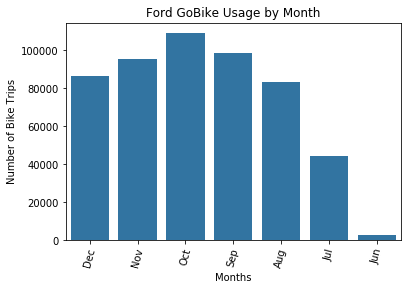

In [30]:
# Monthly usage of the Ford Go Bike system

base_color=sb.color_palette()[0]

sb.countplot(data=df_cleaned,x='start_month_char',color =base_color);
plt.xlabel("Months")
plt.ylabel("Number of Bike Trips")
plt.title('Ford GoBike Usage by Month')
plt.xticks(rotation=75);


**observation**
    October is the most popular month, with september as the second most popular, and November as the third most popular months to use the bike system.
    
  surprisingly, the winter months are the most popular times to use the Ford Go Bike sharing system in 2017.

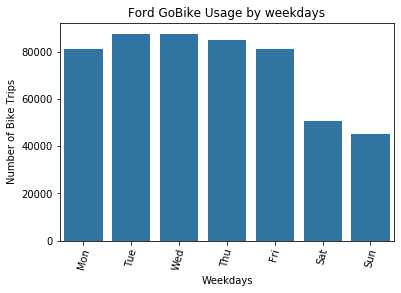

In [31]:
## Weekday usage of the Ford Go bike system

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
base_color=sb.color_palette()[0]

sb.countplot(data=df_cleaned,x='start_time_weekday',color =base_color,order=weekday);
plt.xlabel("Weekdays")
plt.ylabel("Number of Bike Trips")
plt.title('Ford GoBike Usage by weekdays')
plt.xticks(rotation=75);


**Observation2:-**
Tuesdays and Wednesdays seem to be the most popular days for using the bike sharing system, however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers. The usage drops significantly on Saturdays and Sundays 

**Suggestion**:-
Ford bike share system is used during working days

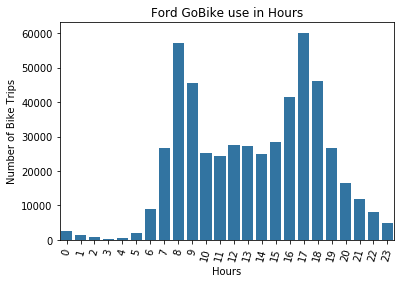

In [33]:
# Hourly usage of the Ford Go Bike System
base_color=sb.color_palette()[0]

sb.countplot(data=df_cleaned,x='start_time_hour',color =base_color);
plt.xlabel("Hours")
plt.ylabel("Number of Bike Trips")
plt.title('Ford GoBike use in Hours')
plt.xticks(rotation=75);


**Observation3**

The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm.

In [36]:
# Locations. 

df_cleaned['start_station_name'].value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)                 15187
The Embarcadero at Sansome St                                      13664
San Francisco Caltrain (Townsend St at 4th St)                     12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)          12055
Market St at 10th St                                               11960
Montgomery St BART Station (Market St at 2nd St)                   11334
Berry St at 4th St                                                 10956
Powell St BART Station (Market St at 4th St)                       10142
Howard St at Beale St                                               9926
Steuart St at Market St                                             9347
Powell St BART Station (Market St at 5th St)                        7987
Embarcadero BART Station (Beale St at Market St)                    7649
2nd St at Townsend St - Coming Soon                                 6605
3rd St at Townsend St                              

In [37]:
df_cleaned['end_station_name'].value_counts()

San Francisco Caltrain (Townsend St at 4th St)                     17378
San Francisco Ferry Building (Harry Bridges Plaza)                 17109
The Embarcadero at Sansome St                                      16531
San Francisco Caltrain Station 2  (Townsend St at 4th St)          13658
Montgomery St BART Station (Market St at 2nd St)                   13443
Market St at 10th St                                               11298
Powell St BART Station (Market St at 4th St)                       11064
Berry St at 4th St                                                 10611
Steuart St at Market St                                             9321
Powell St BART Station (Market St at 5th St)                        8563
Howard St at Beale St                                               7791
2nd St at Townsend St - Coming Soon                                 7277
Townsend St at 7th St                                               6681
Embarcadero BART Station (Beale St at Market St)   

In [39]:
locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St']
df_top5 = df_cleaned.loc[df_cleaned['start_station_name'].isin(locs)]

In [40]:
st_stat_order = df_top5['start_station_name'].value_counts().index


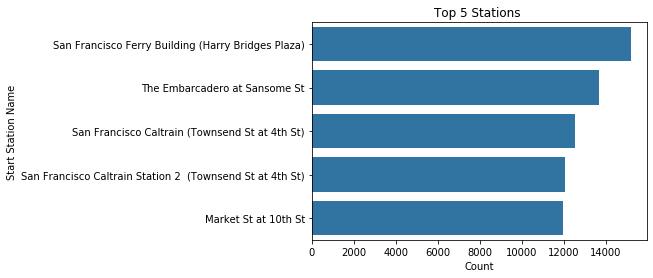

In [41]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_top5, y='start_station_name', color=base_color, order=st_stat_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 5 Stations ');

**observation4**

After checking start and end stations, most stations in San Francisco connect to public transportations such as Caltrain

# Bivariate Exploration

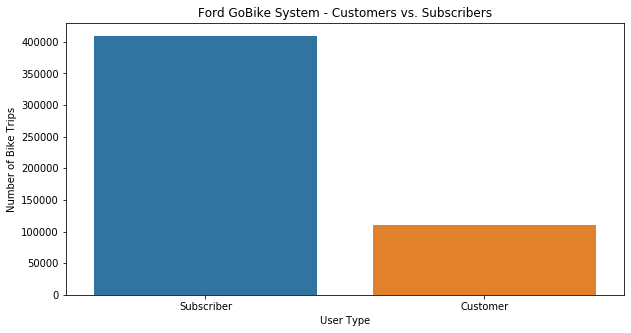

In [51]:
# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [10, 5])

sb.countplot(data = df_cleaned, x = "user_type",order=df_cleaned.user_type.value_counts().index);
plt.xlabel('User Type');
plt.ylabel('Number of Bike Trips');
plt.title('Ford GoBike System - Customers vs. Subscribers');

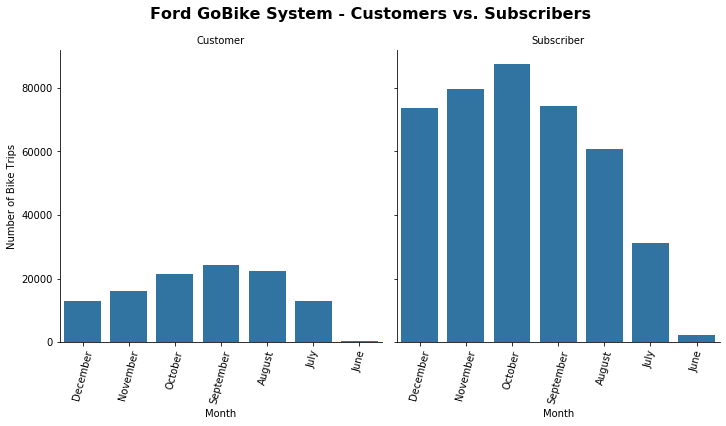

In [60]:
#plt.figure(figsize = [12, 5])
graph = sb.catplot(data=df_cleaned, x='start_time_month', col="user_type", kind='count', sharey = True, color = base_color);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

**Observation**
 
 Winter months are the good for the bike sharing system for both groups what can be determined by the harsher weather.¶

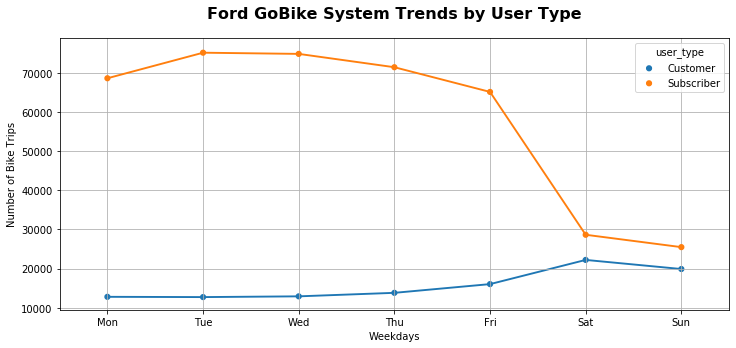

In [61]:
plt.figure(figsize=(12, 5))

df_cleaned_user_week = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

**observation**

 The point plot sharp contrast between Customers and Subscribers

## Sources

.[FordGoBike Data Set](https://s3.amazonaws.com/baywheels-data/index.html)dataset


.[Matplotlib](https://matplotlib.org/)